<a href="https://colab.research.google.com/github/takagf/Desafio-CRUD/blob/main/Desafio_2_com_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/usedcars.csv')

In [5]:
df_enum = pd.get_dummies(df)
df_enum

,year,price,mileage,model_SE,model_SEL,model_SES,color_Black,color_Blue,color_Gold,color_Gray,color_Green,color_Red,color_Silver,color_White,color_Yellow,transmission_AUTO,transmission_MANUAL
0,2011,21992,7413,False,True,False,False,False,False,False,False,False,False,False,True,True,False
1,2011,20995,10926,False,True,False,False,False,False,True,False,False,False,False,False,True,False
2,2011,19995,7351,False,True,False,False,False,False,False,False,False,True,False,False,True,False
3,2011,17809,11613,False,True,False,False,False,False,True,False,False,False,False,False,True,False
4,2012,17500,8367,True,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2006,6200,95000,False,False,True,False,False,False,False,False,False,True,False,False,True,False
146,2002,5995,87003,True,False,False,False,False,False,False,False,True,False,False,False,True,False
147,2000,5980,96841,True,False,False,False,False,False,False,False,True,False,False,False,True,False
148,2001,4899,151479,True,False,False,False,False,False,False,False,False,False,False,True,True,False


In [6]:
dados = df_enum.drop(columns=['price'])
alvo = df_enum['price']

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
dados = scaler.fit_transform(dados)
dados

array([[ 0.83333333, -0.96526887, -1.        , ...,  1.        ,
         1.        , -1.        ],
       [ 0.83333333, -0.91734647, -1.        , ..., -1.        ,
         1.        , -1.        ],
       [ 0.83333333, -0.96611464, -1.        , ..., -1.        ,
         1.        , -1.        ],
       ...,
       [-1.        ,  0.25465855,  1.        , ..., -1.        ,
         1.        , -1.        ],
       [-0.83333333,  1.        ,  1.        , ...,  1.        ,
         1.        , -1.        ],
       [-1.        ,  0.42405806,  1.        , ..., -1.        ,
         1.        , -1.        ]])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dados, alvo, test_size=0.10, random_state=42)

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(16),
  tf.keras.layers.Dense(1)
])

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.R2Score()])

In [23]:
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 176414784.0000 - r2_score: -17.6818
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 170565936.0000 - r2_score: -15.5769 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 177658144.0000 - r2_score: -19.9841 
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 180471456.0000 - r2_score: -20.5641 
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169647008.0000 - r2_score: -16.0571 
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 172121952.0000 - r2_score: -15.1472 
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 175947664.0000 - r2_score: -17.5230 
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 171924992.0000 - r2_score: -17.8761 
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174031424.0000 - r2_score: -17.7693 
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170972896.0000 - r2_score: -18.2723 
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17

In [24]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 2681992.5000 - r2_score: 0.5734


[2681992.5, 0.5734426379203796]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


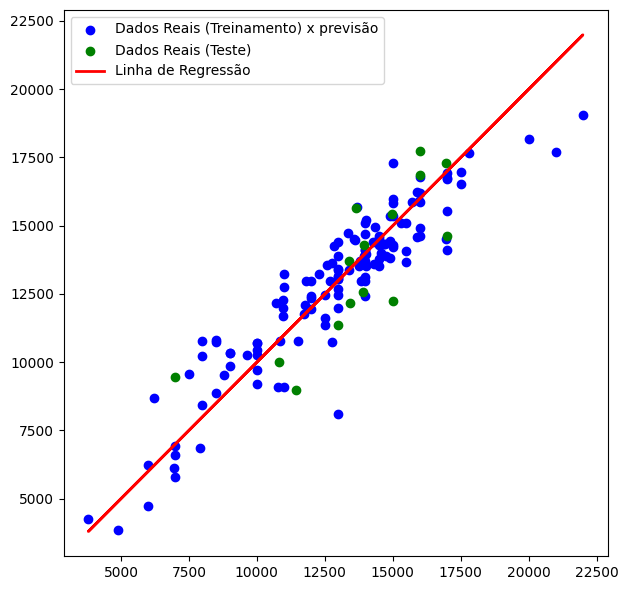

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', label='Dados Reais (Treinamento) x previsão')
plt.scatter(y_test, y_pred_test, color='green', label='Dados Reais (Teste)')
plt.plot(y_train, y_train, color='red', linewidth=2, label='Linha de Regressão')
plt.legend()

plt.tight_layout()
plt.show()